# PCHN63101 Regression Workshop
In the accompanying lesson to this workshop we explored ...

## Minimising Error With a Line

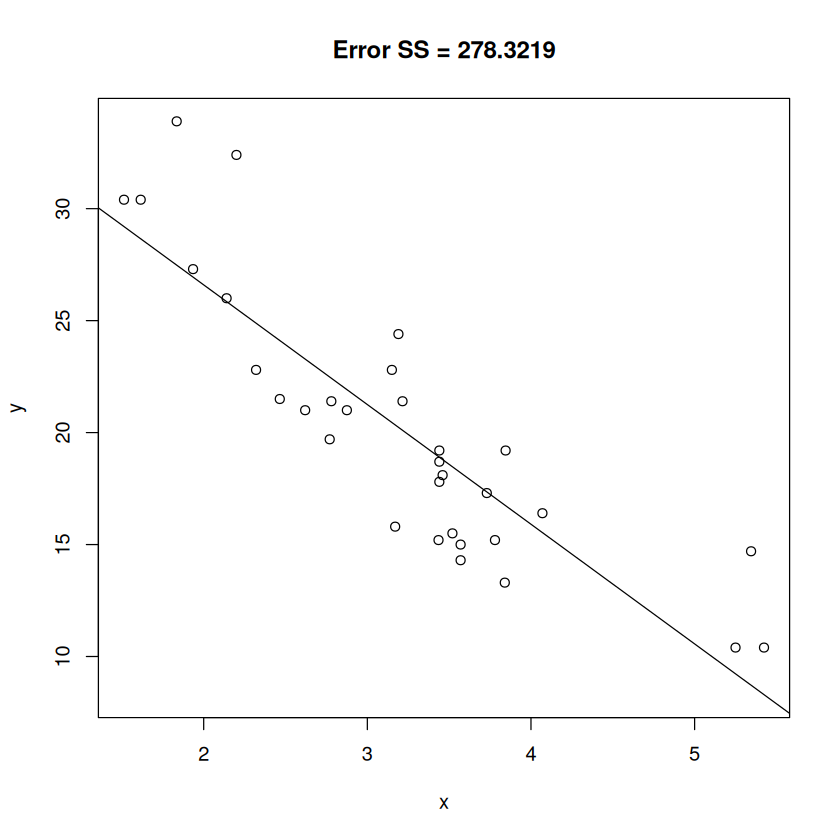

In [1]:
data(mtcars)
y <- mtcars$mpg
x <- mtcars$wt
m <- -5.3445 # OLS m = -5.3445
b <- 37.2851 # OLS b = 37.2851

# error sum-of-squares
error.SS  <- sum((y - (m*x + b))^2)

# figure out y-limits based on the range of estimated values and the data
est.lims  <- c(m*min(x)+b,m*max(x)+b)
est.range <- c(min(est.lims),max(est.lims))
plot.lim  <- c(min(min(y),est.range[1]), 
               max(max(y),est.range[2]))

plot(x, y, main=paste0("Error SS = ",round(error.SS,4)), ylim=plot.lim)
abline(coef=c(b,m))

<div class="alert alert-block alert-info"> 
<b>ACTIVITY</b> Try changing the values of <code>m</code> and <code>b</code> in the code above. Can you make the error sum-of-squares smaller than the OLS estimates?
</div>

## Different Model Equations

Note the use of the `set.seed()` function before each random draw. This gurantees that the "random" selection is always the same every time the code is run. Thus, though there is a "random" element, we can keep it fixed for this demonstration to show that both model forms results in *identical* data.

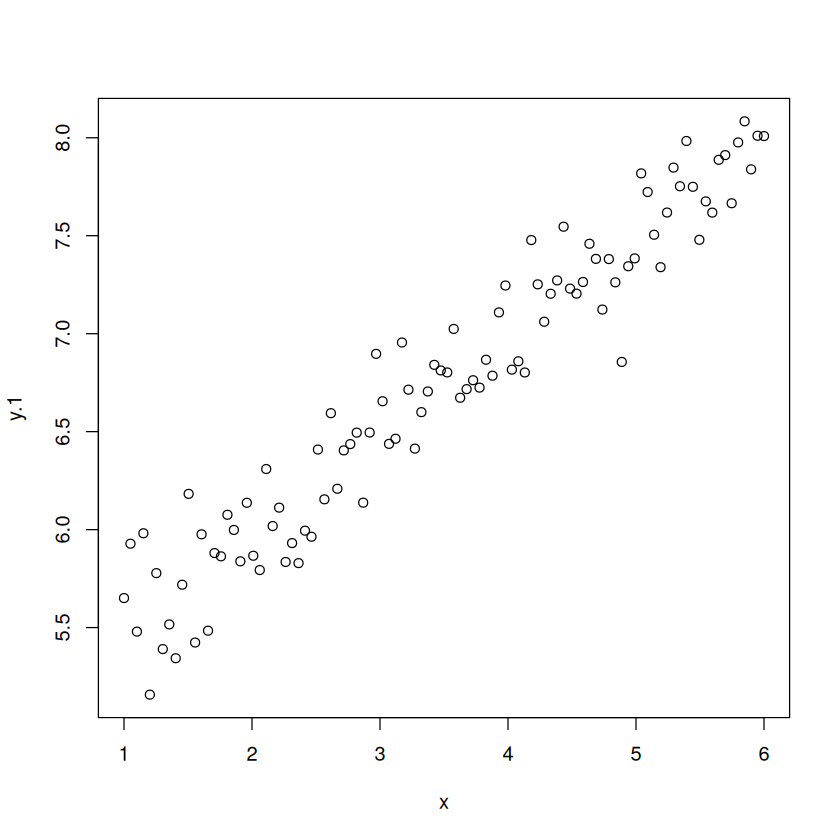

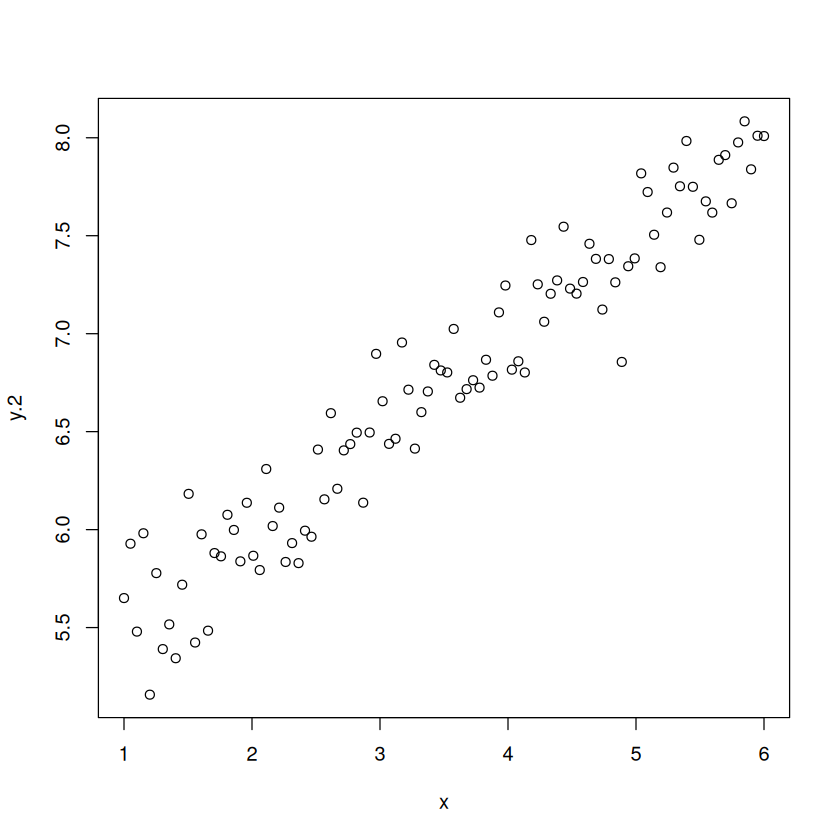

In [2]:
n      <- 100
x      <- seq(from=1, to=6, length.out=n)
beta.0 <- 5
beta.1 <- 0.5
sigma  <- 0.2

set.seed(666)
#===================================================#
# y ~ N(beta.0 + beta.1*x, sigma)                   #
#===================================================#
y.1 <- rnorm(n=n, mean=beta.0 + beta.1*x, sd=sigma)

set.seed(666)
#===================================================#
# y = beta.0 + beta.1*x + e                         #
# e ~ N(0, sigma)                                   #
#===================================================#
err <- rnorm(n=n, mean=0, sd=sigma)
y.2 <- beta.0 + beta.1*x + err

# plots
plot(x,y.1)
plot(x,y.2)

The second form can be thoughts of as simply "line + error". For each value of $x$, the line is *constant*, whereas the data that floats around the line changes with each sample. So it is the *deflections from the line* that are random, *not* the line itself. Hence, it is the errors that are a random variable. They are where the randomness comes from. So, our systematic variance is fixed and predictable (a *constant*) whereas the errors changes with each observation (a *random variable*). We can see this more clearly in the plots below. Adding the first plot to the second plot gives the final model in the third plot. The model is simply the *addition* of both these elements: the fixed line *plus* the random error.

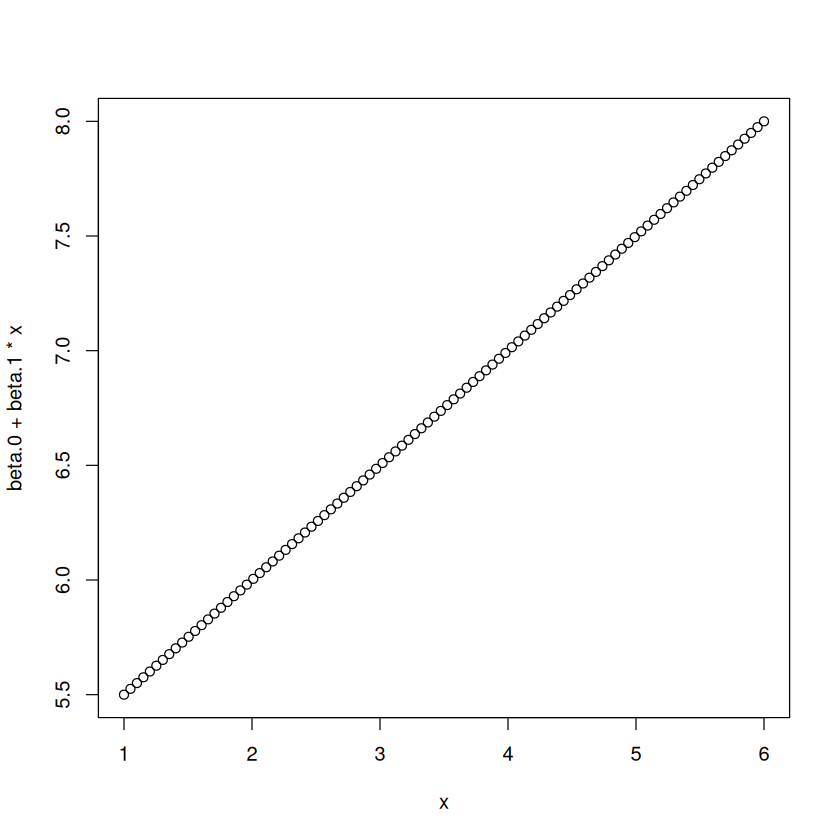

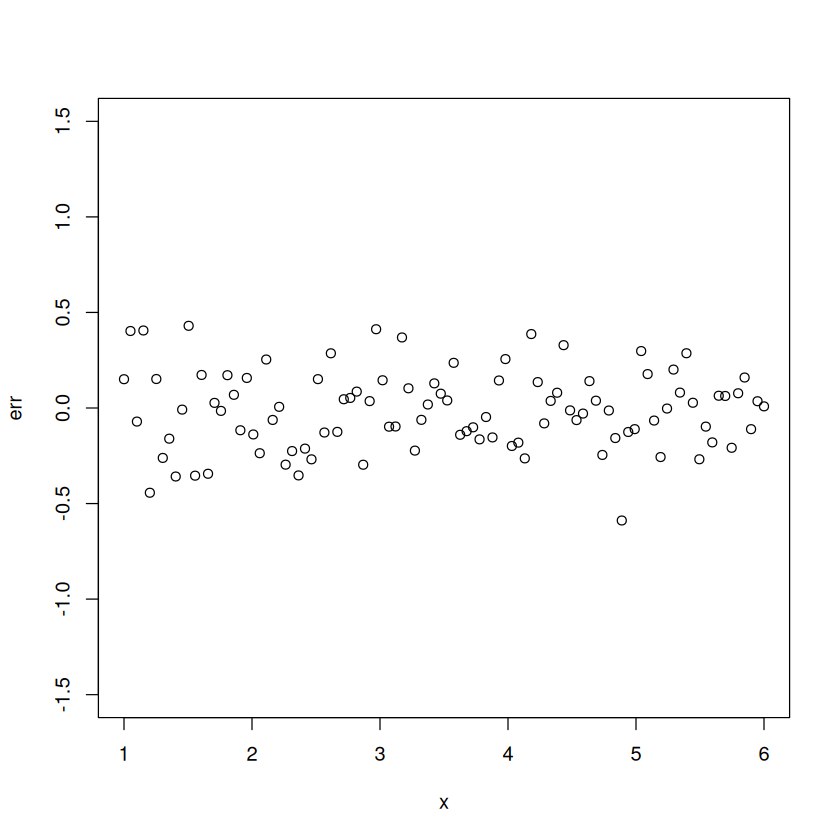

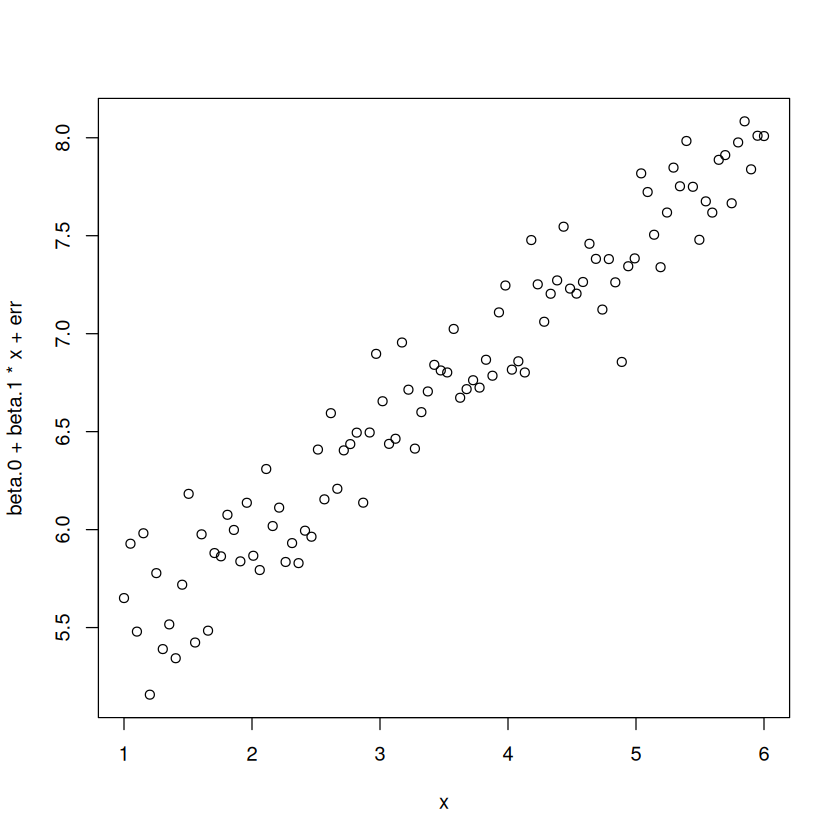

In [3]:
plot(x,beta.0 + beta.1*x)       # fixed line
plot(x,err, ylim=c(-1.5,1.5))   # random error
plot(x,beta.0 + beta.1*x + err) # fixed line + random error (full model)

Notice that the errors represent a random scattering around 0. This is important. The mean of the errors is 0 which implies that, on average, the deflections from the regression line are 0. As such, on average, we expect the data to sit along the regression line. The errors are also evenly scattered *above* and *below* 0. This is also important because it implies that there is nothing systematic that makes the regression line *under-estimate* or *over-estimate* the data. Thus, the random errors are just that: random deflections that are equally likely to place a given data point above the regression or below the regression line. Because the errors are normally distributed, the probability decreases they larger they become. Again, this implies that the data is most likely to be *closer* to the regression line rather than *further away*. Finally, because $\sigma$ is fixed, the random scattering around the regression line does not change with the value of $x$. In other words, the value of our predictor variable is *unrelated* to the spread around the regression line. This is a *simplifying assumption* made in linear regression and one we will return to later on the unit.

## Maximum Likelihood

In [ ]:
set.seed(123)
x <- mtcars$wt
y <- mtcars$mpg

# Define negative log-likelihood
neg.loglik <- function(params) {
  beta.0 <- params[1]
  beta.1 <- params[2]
  sigma  <- params[3]

  if (sigma <= 0) return(1e10)

  mu     <- beta.0 + beta.1*x    
  loglik <- sum(dnorm(y, mean=mu, sd=sigma, log=TRUE)) # log-likelihood
  return(-loglik)                                      # -ve log-likelihood
}

# Starting values (guesses for intercept, slope and SD)
init.params <- c(mean(y), 0, sd(y))

# Run optimisation
mle <- nlm(f=neg.loglik, p=init.params)

# Print results
mle_pars <- mle$estimate
names(mle_pars) <- c("beta.0", "beta.1", "sigma")
cat(paste0("Estimation complete in ",mle$iterations, " iterations:\n\n"))
print(mle_pars)

Estimation complete in 15 iterations:

   beta.0    beta.1     sigma 
37.285127 -5.344472  2.949163 


<div class="alert alert-block alert-info"> 
<b>ACTIVITY</b> Try changing the starting values in <code>init.params</code>. What does this do to the number of iterations required? Can you break the estimation and get the algorithm to converge on very different parameter estimates? What does this tell you about the process of optimisation?
</div>

## Regression as a Mean and Variance Function

In [4]:
data(mtcars)
mod <- lm(mpg ~ wt, data=mtcars)

We can see that the fitted/predicted values from the regression are *exactly* the results given by the mean function for the different measured values of `wt`. 

We can also simulate some data based on this model and see whether it looks similar to the data we have measured. This simulated data will capture the *general pattern* in the data (the systematic variance) as well as the *spread* around the regression line (the random error variance). In the example below, we generate a range of $x$-values from 1 to 6 (using the `seq()` function). We then replicate this range 3 times, so that we will end up simulating 3 value of $y$ for each value of $x$. We then simulate each $y$-value using the mean and variance functions. The result of the simulation is plotted below.

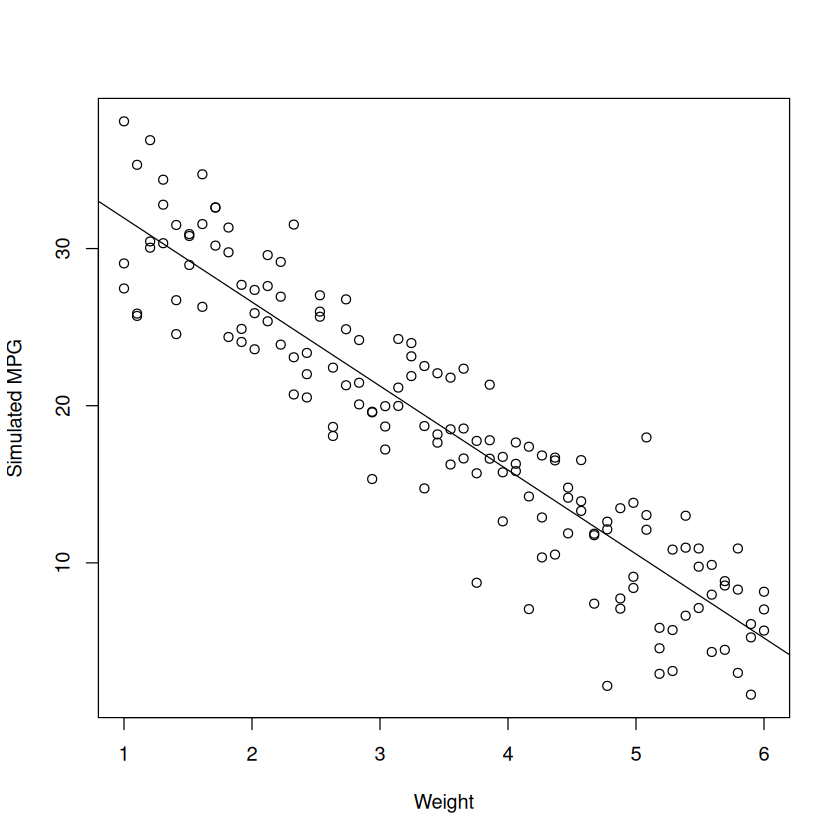

In [5]:
mean.func <- function(i,x){
    beta.0 <- coef(mod)[1]
    beta.1 <- coef(mod)[2]
    mu.i   <- beta.0 + beta.1*x[i]
    return(mu.i)
}

var.func <- function(i,x){
    sigma2 <- summary(mod)$sigma^2
    return(sigma2)
}

# control the number of simulated values
n.x    <- 50
n.reps <- 3

# generate x values
x     <- seq(from=1, to=6, length.out=n.x)
x     <- rep(x,n.reps)

# simulate y
nsubs <- length(x)
y.sim <- rep(0,nsubs)
for (i in 1:nsubs){
    y.sim[i] <- rnorm(n=1, mean=mean.func(i,x), sd=sqrt(var.func(i,x)))
}

# plot
plot(x, y.sim, xlab="Weight", ylab="Simulated MPG")
abline(reg=mod)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY</b> Have a play around with the values of <code>n.x</code> and <code>n.reps</code> in the code above. These control how many values of <code>wt</code> are included in the simulations, as well as how many cars at each value of <code>wt</code> we measure.
</div>

Notice that this simulation does *not* reflect the fact that, in the real data, at both lower and higher values of `wt`, the measures of `mpg` lie *above* the regression line. So while this simulation matches some elements of the data, it does not match all of them. Indeed, as we will see in future weeks, a *curved* line may be a better fit here than a *straight* line. We can see this as the curved yellow line in the plot below. We will discuss this type of visualisation in more detail a little later on the unit. For now, just try and make sure it is clear that the simulated data is based on assuming the straight-line fit is accurate. The simulation is what our model says the data-generating process is, but we need to be sure that this agrees with what we can *actually* see.

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



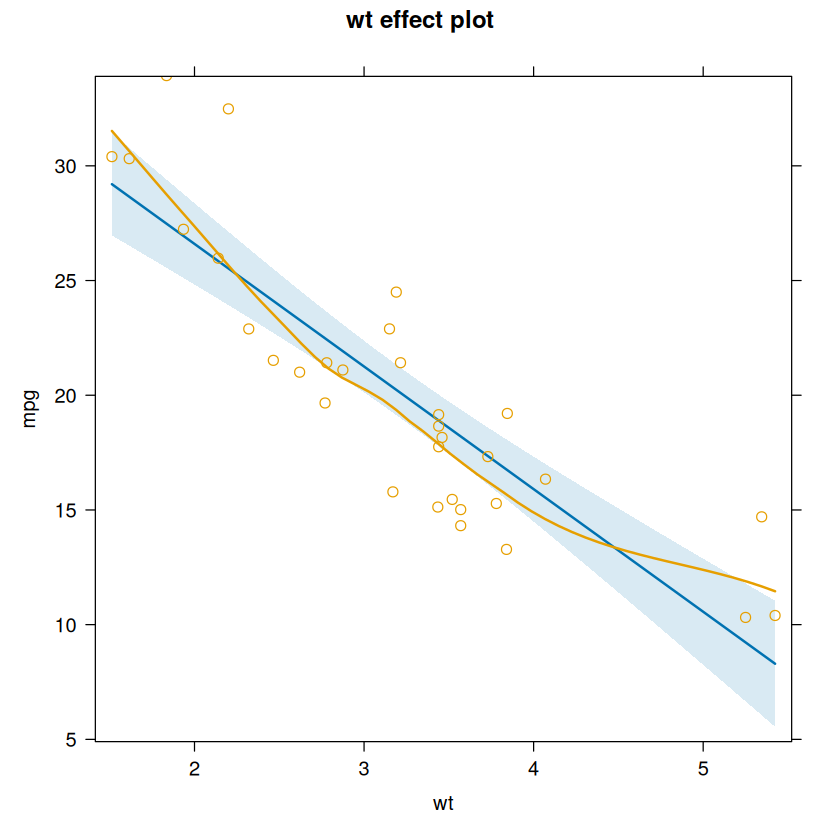

In [6]:
library(effects)
plot(allEffects(mod, residuals=TRUE))

## The `R` Formula Interface
... So, we can specify a model with an intercept in two different ways

In [12]:
mod.1 <- lm(mpg ~ wt,     data=mtcars) # intercept implied
mod.2 <- lm(mpg ~ 1 + wt, data=mtcars) # intercept explicit

mod.1
mod.2


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  



Call:
lm(formula = mpg ~ 1 + wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  


We can also specify a model *without* an intercept in two different ways

In [11]:
mod.1 <- lm(mpg ~ 0 + wt, data=mtcars) # an intercept of 0
mod.2 <- lm(mpg ~ wt - 1, data=mtcars) # remove intercept

mod.1
mod.2


Call:
lm(formula = mpg ~ 0 + wt, data = mtcars)

Coefficients:
   wt  
5.292  



Call:
lm(formula = mpg ~ wt - 1, data = mtcars)

Coefficients:
   wt  
5.292  


You can use whichever format feels most intuitive to you. Most examples of `lm()` that you will see in the wild use the `y ~ x1` and `y ~ x1 - 1` formats, though you may personally prefer `y ~ 1 + x1` and `y ~ 0 + x1` as it makes the model form clearer. Just note that if you want a model that *only* contains an intercept, you need to use

In [14]:
mod <- lm(mpg ~ 1, data=mtcars) # intercept only
mod


Call:
lm(formula = mpg ~ 1, data = mtcars)

Coefficients:
(Intercept)  
      20.09  


You can even specify a model without anything in it by writing an intercept-only model using `0`. Why you would want this is anyone's guess, but it is possible.

In [13]:
mod <- lm(mpg ~ 0, data=mtcars) # model containing nothing
mod


Call:
lm(formula = mpg ~ 0, data = mtcars)

No coefficients
